### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [54]:
data = pd.read_csv(r'C:\Users\bobsb\Boot Camp\5 Mod Practical\coupons.csv')
data.shape

(12684, 26)

In [55]:
#Correct the misspelling of 'passanger' column to 'passenger
data.rename(columns={'passanger': 'passenger'}, inplace=True)

In [56]:
#Get a glimpse of the data
data.head()


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [57]:
data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [59]:
data['temperature'].unique()

array([55, 80, 30], dtype=int64)

2. Investigate the dataset for missing or problematic data.

In [61]:
#Figure out which columns contain missing or problematic values
data.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [62]:
data.drop('car', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [63]:
#Drop missing data from columns
#data.dropna.().info()
data = data.dropna()
#data.dropna(inplace = True)
data


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [64]:
data.isnull().sum()

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [65]:
#pd.crosstab(index=data['Y'], columns="count", normalize=True)
#data['A'].value_counts() / data['A'].count()
data['Y'].mean()

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Types')

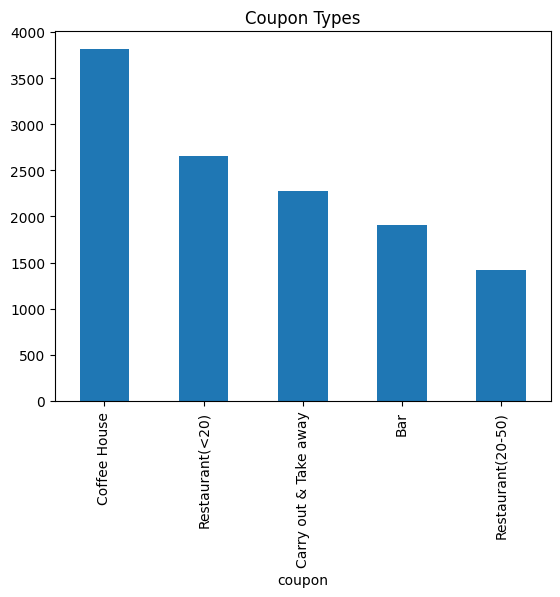

In [66]:
data['coupon'].value_counts().plot(kind='bar')

plt.title("Coupon Types")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperatures')

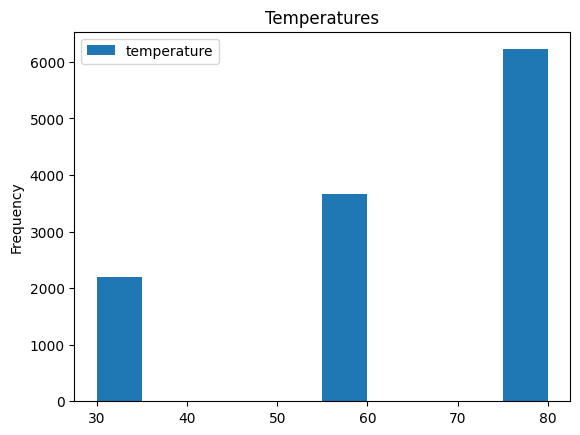

In [67]:
data.plot(kind='hist' , y= 'temperature')
plt.title("Temperatures")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
#create new dataframe using bracket method
bar = data[data['coupon'] == 'Bar']
#data[data['coupon'] == 'Bar']
bar

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [70]:
#determine how many unique values appear in the 'bar' column
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [71]:
bar_proportion = bar['Y'].mean()
bar_proportion

0.41191845269210664

In [72]:
bar.shape

(1913, 25)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [73]:
three_or_less = bar[bar['Bar'].isin(['never', 'less1', '1~3'])]
print('three_or_less', three_or_less.Y.mean())


three_or_less 0.37267441860465117


In [74]:
four_or_more = bar[bar['Bar'].isin(['gt8', '4~8'])]
print('four_or_more', four_or_more.Y.mean())


four_or_more 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [75]:
bar_more_once = bar[(bar['Bar'].isin(['1~3', 'gt8', '4~8'])) & (bar['age'].isin(['46', '26', '31', '41', '50plus', '36']))]
print('bar_more_once', bar_more_once.Y.mean())

bar_more_once 0.6898263027295285


In [76]:
#use tilda to make line of code opposite. see cell above 
no_bar_more_once = bar[(~bar['Bar'].isin(['1~3', 'gt8', '4~8'])) & (~bar['age'].isin(['46', '26', '31', '41', '50plus', '36']))]
print('no_bar_more_once', no_bar_more_once.Y.mean())

no_bar_more_once 0.3883495145631068


In [78]:
bar_more_once_count = len(bar_more_once)
no_bar_more_once_count = len(no_bar_more_once)
bar_proportion = bar_more_once_count / no_bar_more_once_count
bar_proportion

1.3042071197411003

#### Drivers over 25 who go to the bar more than once a month accepted the coupon 1.3 times more than all others.

In [79]:
data.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [80]:
other_accept = bar[(bar['Bar'].isin(['1~3', 'gt8', '4~8'])) & (~bar['passenger'].isin(['Kid(s)'])) & (~bar['occupation'].isin(['Farming Fishing & Forestry']))]
print('other_accept', other_accept.Y.mean())

other_accept 0.7094339622641509


In [81]:
data.passenger.unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [82]:
data.occupation.unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [83]:
not_widowed = bar[(bar['Bar'].isin(['1~3', 'gt8', '4~8'])) & (~bar['passenger'].isin(['Kid(s)'])) & (~bar['maritalStatus'].isin(['Widowed']))]
print('not_widowed', not_widowed.Y.mean())

not_widowed 0.7094339622641509


In [84]:
under_30 = bar[(bar['Bar'].isin(['1~3', 'gt8', '4~8'])) & (bar['age'].isin(['21', '26', 'below21']))]
print('under_30', under_30.Y.mean())

under_30 0.7195121951219512


In [85]:
cheap = bar[(bar['RestaurantLessThan20'].isin(['gt8', '4~8'])) & (~bar['income'].isin([['$12500 - $24999',
       '$37500 - $49999', '$25000 - $37499',
        'Less than $12500']]))]
print('cheap', cheap.Y.mean())

cheap 0.42915531335149865


In [86]:
data.income.unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [87]:
data.RestaurantLessThan20.unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [88]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [89]:
data.maritalStatus.unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Which age and gender accepts bar coupons the most?

In [90]:
age_gender_acceptance = bar[bar['Y'] == 1].groupby(['age', 'gender']).size().reset_index(name='Accepted_Count')
age_gender_acceptance

,age,gender,Accepted_Count
0,21,Female,84
1,21,Male,116
2,26,Female,81
3,26,Male,98
4,31,Female,51
5,31,Male,71
6,36,Female,23
7,36,Male,37
8,41,Female,39
9,41,Male,36


In [91]:
age_gender_acceptance = age_gender_acceptance.sort_values(by = 'Accepted_Count', ascending = False)
age_gender_acceptance

,age,gender,Accepted_Count
1,21,Male,116
3,26,Male,98
0,21,Female,84
2,26,Female,81
5,31,Male,71
4,31,Female,51
13,50plus,Male,49
8,41,Female,39
7,36,Male,37
9,41,Male,36


In [92]:
total_counts = bar.groupby(['age', 'gender'])['Y'].count().reset_index()
total_counts.rename(columns={'Y': 'Total_Offers'}, inplace=True)
total_counts.sort_values(by = 'Total_Offers', ascending = False)


,age,gender,Total_Offers
0,21,Female,202
3,26,Male,199
1,21,Male,195
4,31,Female,179
2,26,Female,169
12,50plus,Female,162
5,31,Male,145
13,50plus,Male,111
7,36,Male,105
8,41,Female,104


### How to determine which age and sex accepted the coupon most number of times and had the highest acceptance rate.

In [93]:
total_counts = bar.groupby(['age', 'gender'])['Y'].count().reset_index()
total_counts


,age,gender,Y
0,21,Female,202
1,21,Male,195
2,26,Female,169
3,26,Male,199
4,31,Female,179
5,31,Male,145
6,36,Female,91
7,36,Male,105
8,41,Female,104
9,41,Male,67


In [94]:
summary = bar.groupby(['age', 'gender'])['Y'].agg(['sum', 'count']).reset_index().sort_values(by = 'count', ascending = False)
summary

,age,gender,sum,count
0,21,Female,84,202
3,26,Male,98,199
1,21,Male,116,195
4,31,Female,51,179
2,26,Female,81,169
12,50plus,Female,31,162
5,31,Male,71,145
13,50plus,Male,49,111
7,36,Male,37,105
8,41,Female,39,104


In [95]:
summary.rename(columns={'sum': 'accepted_count', 'count': 'total_offers'}, inplace=True)
summary

,age,gender,accepted_count,total_offers
0,21,Female,84,202
3,26,Male,98,199
1,21,Male,116,195
4,31,Female,51,179
2,26,Female,81,169
12,50plus,Female,31,162
5,31,Male,71,145
13,50plus,Male,49,111
7,36,Male,37,105
8,41,Female,39,104


In [96]:
summary['acceptance_rate'] = summary['accepted_count'] / summary['total_offers']
summary.sort_values(by = 'acceptance_rate', ascending = False)

,age,gender,accepted_count,total_offers,acceptance_rate
1,21,Male,116,195,0.594872
9,41,Male,36,67,0.537313
3,26,Male,98,199,0.492462
5,31,Male,71,145,0.489655
2,26,Female,81,169,0.479290
13,50plus,Male,49,111,0.441441
11,46,Male,25,57,0.438596
14,below21,Female,17,39,0.435897
0,21,Female,84,202,0.415842
15,below21,Male,17,42,0.404762


### Males who are 21 accepted the most amount of offers and had the highest percentage acceptance rate.

In [97]:
result_df = summary[['age', 'gender', 'accepted_count', 'total_offers', 'acceptance_rate']]
result_df

,age,gender,accepted_count,total_offers,acceptance_rate
0,21,Female,84,202,0.415842
3,26,Male,98,199,0.492462
1,21,Male,116,195,0.594872
4,31,Female,51,179,0.284916
2,26,Female,81,169,0.479290
12,50plus,Female,31,162,0.191358
5,31,Male,71,145,0.489655
13,50plus,Male,49,111,0.441441
7,36,Male,37,105,0.352381
8,41,Female,39,104,0.375000


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### General Data

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [99]:
data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [100]:
data.CoffeeHouse.unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

In [101]:
#Create dataframe of CoffeeHouse Coupon offers
coffee = data[data['coupon'] == 'Coffee House']
coffee

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


### 1. What proportion of Coffee House coupons were accepted?

In [103]:
coffee_accepted = coffee.Y.mean()
coffee_accepted

0.49633123689727465

### 2. Compare the acceptance rate of all coupons type. Which had the highest and lowest acceptance rates?

In [104]:
#Find acceptance rate of 'Restaurant(<20)'
Restaurant_less_than_20_rate = data[data['coupon'] == 'Restaurant(<20)']
Restaurant_less_than_20_rate.Y.mean()

0.7090086694308331

In [105]:
Restaurant_20_50_rate = data[data['coupon'] == 'Restaurant(20-50)']
Restaurant_20_50_rate.Y.mean()

0.44601270289343686

In [106]:
carryout_rate = data[data['coupon'] == 'Carry out & Take away']
carryout_rate.Y.mean()

0.737719298245614

In [107]:
bar_rate = data[data['coupon'] == 'Bar']
bar_rate.Y.mean()

0.41191845269210664

## Conclusion: Carryout had the highest acceptance rate at 73.5% while  bars had the lowest acceptance rate of 41%.

### 3. Compare the acceptance rate between those who went to a coffee shop 3 or fewer times a month to those who went more.


In [142]:
coffee_compare_3 = coffee[coffee['CoffeeHouse'].isin(['never', 'less1', '1~3'])]
print('coffee_compare_3', coffee_compare_3.Y.mean())

coffee_compare_3 0.44590495449949447


In [109]:
coffee_compare_4 = coffee[~coffee['CoffeeHouse'].isin(['never', 'less1', '1~3'])]
print('coffee_compare_4', coffee_compare_4.Y.mean())

coffee_compare_4 0.6725559481743227


In [145]:
proportion = coffee_compare_4.Y.mean() / coffee_compare_3.Y.mean()
proportion

1.5082944053161114

## People who go to coffee shops 4 or more times a month accepted the coupons at a rate of 1.5 times more than those who go 3 or less times per month.

### 4. What demographic is the most and least likely to accept coffeehouse coupons?

In [111]:
summary.reset_index()

,index,age,gender,accepted_count,total_offers,acceptance_rate
0,0,21,Female,84,202,0.415842
1,3,26,Male,98,199,0.492462
2,1,21,Male,116,195,0.594872
3,4,31,Female,51,179,0.284916
4,2,26,Female,81,169,0.479290
5,12,50plus,Female,31,162,0.191358
6,5,31,Male,71,145,0.489655
7,13,50plus,Male,49,111,0.441441
8,7,36,Male,37,105,0.352381
9,8,41,Female,39,104,0.375000


In [112]:
summary = coffee.groupby(['age', 'gender'])['Y'].agg(['sum', 'count']).reset_index().sort_values(by = 'count', ascending = False)
summary

,age,gender,sum,count
1,21,Male,228,458
2,26,Female,210,402
3,26,Male,199,395
0,21,Female,209,386
4,31,Female,170,339
12,50plus,Female,137,324
5,31,Male,114,248
7,36,Male,101,217
13,50plus,Male,85,205
8,41,Female,89,185


In [113]:
summary.rename(columns={'sum': 'accepted_count', 'count': 'total_offers'}, inplace=True)
summary

,age,gender,accepted_count,total_offers
1,21,Male,228,458
2,26,Female,210,402
3,26,Male,199,395
0,21,Female,209,386
4,31,Female,170,339
12,50plus,Female,137,324
5,31,Male,114,248
7,36,Male,101,217
13,50plus,Male,85,205
8,41,Female,89,185


In [114]:
summary['age_gender'] = summary['age'].astype(str) + " - " + summary['gender']
summary

,age,gender,accepted_count,total_offers,age_gender
1,21,Male,228,458,21 - Male
2,26,Female,210,402,26 - Female
3,26,Male,199,395,26 - Male
0,21,Female,209,386,21 - Female
4,31,Female,170,339,31 - Female
12,50plus,Female,137,324,50plus - Female
5,31,Male,114,248,31 - Male
7,36,Male,101,217,36 - Male
13,50plus,Male,85,205,50plus - Male
8,41,Female,89,185,41 - Female


In [151]:
summary['acceptance_rate'] = summary['accepted_count'] / summary['total_offers']
summary.sort_values(by = 'acceptance_rate', ascending = False)
summary = summary[['age_gender', 'accepted_count', 'total_offers', 'acceptance_rate']]
summary

,age_gender,accepted_count,total_offers,acceptance_rate
0,21 - Male,228,458,0.497817
1,26 - Female,210,402,0.522388
2,26 - Male,199,395,0.503797
3,21 - Female,209,386,0.541451
4,31 - Female,170,339,0.501475
5,50plus - Female,137,324,0.422840
6,31 - Male,114,248,0.459677
7,36 - Male,101,217,0.465438
8,50plus - Male,85,205,0.414634
9,41 - Female,89,185,0.481081


In [152]:
summary.columns




Index(['age_gender', 'accepted_count', 'total_offers', 'acceptance_rate'], dtype='object')

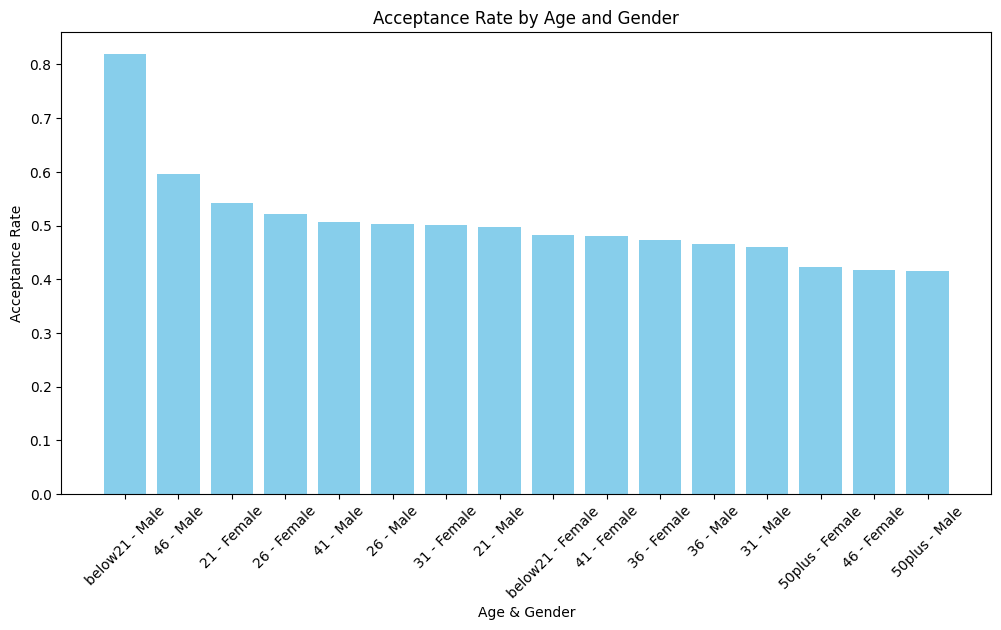

In [154]:


# **Sort by acceptance rate in descending order**
summary_sorted = summary.sort_values(by='acceptance_rate', ascending=False)

# Plot the bar chart using the sorted data
plt.figure(figsize=(12,6))
plt.bar(summary_sorted['age_gender'], summary_sorted['acceptance_rate'], color='skyblue')

# Formatting the chart
plt.xlabel("Age & Gender")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Age and Gender")
plt.xticks(rotation=45,)  # Rotates x-axis labels for better readability

# Show the plot
plt.show()

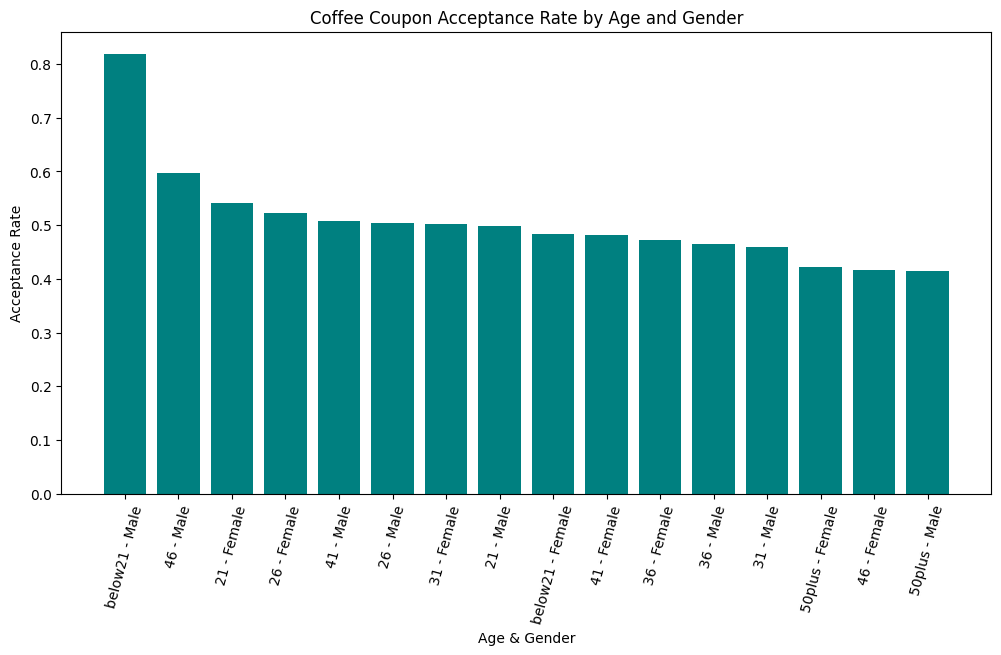

In [155]:

# Plot the bar chart using the sorted data
plt.figure(figsize=(12,6))
plt.bar(summary_sorted['age_gender'], summary_sorted['acceptance_rate'], color='teal')

#Format and title
plt.xlabel("Age & Gender")
plt.ylabel("Acceptance Rate")
plt.title("Coffee Coupon Acceptance Rate by Age and Gender")
plt.xticks(rotation=75) #tilt to 75 to avoid clutter

plt.show()


In [121]:
print(summary.isnull().sum())  
summary = summary.dropna(subset=['accepted_count', 'total_offers'])  


index              0
age                0
gender             0
accepted_count     0
total_offers       0
age_gender         0
acceptance_rate    0
dtype: int64


In [122]:
summary['acceptance_rate'] = summary['accepted_count'] / summary['total_offers']
summary.sort_values('acceptance_rate', ascending = False)


,index,age,gender,accepted_count,total_offers,age_gender,acceptance_rate
14,15,below21,Male,68,83,below21 - Male,0.819277
12,11,46,Male,65,109,46 - Male,0.596330
3,0,21,Female,209,386,21 - Female,0.541451
1,2,26,Female,210,402,26 - Female,0.522388
11,9,41,Male,67,132,41 - Male,0.507576
2,3,26,Male,199,395,26 - Male,0.503797
4,4,31,Female,170,339,31 - Female,0.501475
0,1,21,Male,228,458,21 - Male,0.497817
15,14,below21,Female,29,60,below21 - Female,0.483333
9,8,41,Female,89,185,41 - Female,0.481081


## Conclusion: Males below age 21 are most likely to accept the coffeehouse coupon at a rate of 81.9%. Males aged 50 and up are least likely to accept the coupons at a rate of only 41.4%.

### 5. Which coupons are drivers with kids as passegers most and least likely to accept?

In [123]:
kids = data[data['passenger'] == 'Kid(s)']
kids

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
73,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
74,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
76,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
77,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12640,No Urgent Place,Kid(s),Sunny,30,10PM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,0,1,0
12641,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,0,1,0
12649,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1
12650,Home,Kid(s),Sunny,55,10PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,1,0,0


In [125]:
data.passenger.unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [126]:
coupon_acceptance = kids.groupby('coupon').Y.mean().reset_index()
coupon_acceptance.rename(columns={'Y': 'acceptance_rate'}, inplace=True)
coupon_acceptance

,coupon,acceptance_rate
0,Bar,0.206186
1,Carry out & Take away,0.697183
2,Coffee House,0.471503
3,Restaurant(20-50),0.368750
4,Restaurant(<20),0.710843


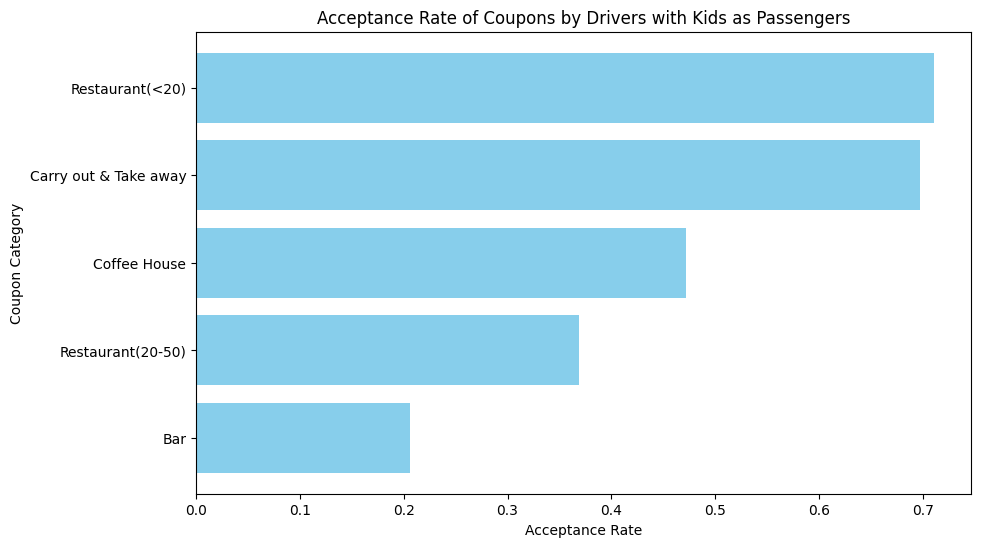

In [127]:
import matplotlib.pyplot as plt

# Sort by acceptance rate in descending order
coupon_acceptance = coupon_acceptance.sort_values(by='acceptance_rate', ascending=False)

# Display as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(coupon_acceptance['coupon'], coupon_acceptance['acceptance_rate'], color='skyblue')
plt.xlabel("Acceptance Rate")
plt.ylabel("Coupon Category")
plt.title("Acceptance Rate of Coupons by Drivers with Kids as Passengers")
plt.gca().invert_yaxis()  # Invert to show highest on top
plt.show()


## Conclusion: Passengers with children were most likely to accept coupons from restaurants under $20 at a rate of 71% with carryout coupons coming in at a close second with an acceptnace rate of 69.7%. Bar coupons for the same group were least accepted at a rate of only 20%.

#### 6. At what time is each particular coupon accepted or rejected most by drivers with kid passengers?

In [128]:
data.time.unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

In [129]:
kid_accept = kids.groupby(['time', 'coupon'])['Y'].count().reset_index()
kid_accept

,time,coupon,Y
0,10AM,Bar,83
1,10AM,Carry out & Take away,83
2,10AM,Coffee House,33
3,10AM,Restaurant(<20),83
4,10PM,Bar,32
5,10PM,Carry out & Take away,22
6,10PM,Restaurant(20-50),101
7,2PM,Coffee House,77
8,2PM,Restaurant(20-50),32
9,2PM,Restaurant(<20),141


In [130]:
total_offers = kids.groupby(['time', 'coupon'])['Y'].count().reset_index()
total_offers.rename(columns={'Y': 'total_offers'}, inplace=True)
total_offers
# Count accepted offers per 'time' and 'coupon' (Y == 1)
#accepted_offers = kids.groupby(['time', 'coupon'])['Y'].sum().reset_index()
#accepted_offers.rename(columns={'Y': 'accepted_offers'}, inplace=True)

# Merge the two DataFrames
#acceptance_rates = pd.merge(total_offers, accepted_offers, on=['time', 'coupon'])

# Calculate acceptance rate
#acceptance_rates['acceptance_rate'] = acceptance_rates['accepted_offers'] / acceptance_rates['total_offers']
#acceptance_rates


,time,coupon,total_offers
0,10AM,Bar,83
1,10AM,Carry out & Take away,83
2,10AM,Coffee House,33
3,10AM,Restaurant(<20),83
4,10PM,Bar,32
5,10PM,Carry out & Take away,22
6,10PM,Restaurant(20-50),101
7,2PM,Coffee House,77
8,2PM,Restaurant(20-50),32
9,2PM,Restaurant(<20),141


In [162]:
accepted_offers = kids.groupby(['time', 'coupon'])['Y'].sum().reset_index()
accepted_offers.rename(columns={'Y': 'accepted_offers'}, inplace=True)
accepted_offers

,time,coupon,accepted_offers
0,10AM,Bar,12
1,10AM,Carry out & Take away,61
2,10AM,Coffee House,23
3,10AM,Restaurant(<20),50
4,10PM,Bar,4
5,10PM,Carry out & Take away,8
6,10PM,Restaurant(20-50),28
7,2PM,Coffee House,42
8,2PM,Restaurant(20-50),16
9,2PM,Restaurant(<20),107


In [132]:
acceptance_rates = pd.merge(total_offers, accepted_offers, on=['time', 'coupon'])
acceptance_rates

,time,coupon,total_offers,accepted_offers
0,10AM,Bar,83,12
1,10AM,Carry out & Take away,83,61
2,10AM,Coffee House,33,23
3,10AM,Restaurant(<20),83,50
4,10PM,Bar,32,4
5,10PM,Carry out & Take away,22,8
6,10PM,Restaurant(20-50),101,28
7,2PM,Coffee House,77,42
8,2PM,Restaurant(20-50),32,16
9,2PM,Restaurant(<20),141,107


In [133]:
acceptance_rates['acceptance_rate'] = acceptance_rates['accepted_offers'] / acceptance_rates['total_offers']
acceptance_rates.sort_values('acceptance_rate', ascending = False)


,time,coupon,total_offers,accepted_offers,acceptance_rate
11,6PM,Carry out & Take away,37,30,0.810811
14,6PM,Restaurant(<20),25,20,0.800000
9,2PM,Restaurant(<20),141,107,0.758865
1,10AM,Carry out & Take away,83,61,0.734940
2,10AM,Coffee House,33,23,0.696970
3,10AM,Restaurant(<20),83,50,0.602410
13,6PM,Restaurant(20-50),27,15,0.555556
7,2PM,Coffee House,77,42,0.545455
8,2PM,Restaurant(20-50),32,16,0.500000
5,10PM,Carry out & Take away,22,8,0.363636


In [164]:
# Filter dataset for drivers with kids as passengers
kids = data[data['passenger'] == "Kid(s)"]

# Count total number of offers per coupon type
total_offers = kids.groupby('coupon')['Y'].count().reset_index()
total_offers.rename(columns={'Y': 'total_offers'}, inplace=True)

# Count accepted offers per coupon type (Y == 1)
accepted_offers = kids.groupby('coupon')['Y'].sum().reset_index()
accepted_offers.rename(columns={'Y': 'accepted_offers'}, inplace=True)

# Merge both DataFrames
coupon_acceptance = pd.merge(total_offers, accepted_offers, on='coupon')

# Calculate acceptance rate (accepted offers / total offers)
coupon_acceptance['acceptance_rate'] = coupon_acceptance['accepted_offers'] / coupon_acceptance['total_offers']

# Sort in descending order
coupon_acceptance = coupon_acceptance.sort_values(by='acceptance_rate', ascending=False)

coupon_acceptance

,coupon,total_offers,accepted_offers,acceptance_rate
4,Restaurant(<20),249,177,0.710843
1,Carry out & Take away,142,99,0.697183
2,Coffee House,193,91,0.471503
3,Restaurant(20-50),160,59,0.368750
0,Bar,194,40,0.206186


In [172]:
""""
# sorted_data = acceptance_rates.sort_values(by='acceptance_rate', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(x='coupon', y='acceptance_rate', data=sorted_data, palette="coolwarm")


plt.xlabel("Coupon Type")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Coupon Type")
plt.xticks(rotation=45)
plt.legend(['Spread'])
plt.show()
""""

SyntaxError: unterminated string literal (detected at line 15) (2452527428.py, line 15)

#### Conclusion: We determined that drivers with children accepted carryout coupons specifically at 6pm at the highest rate, which was 81%. Restaurants under 20$ came in at a very close second with an acceptance rate of 80% at 6pm. The least accepted coupon for drivers with kids were bar coupons at 10pm with an acceptance rate of only 12.5%.

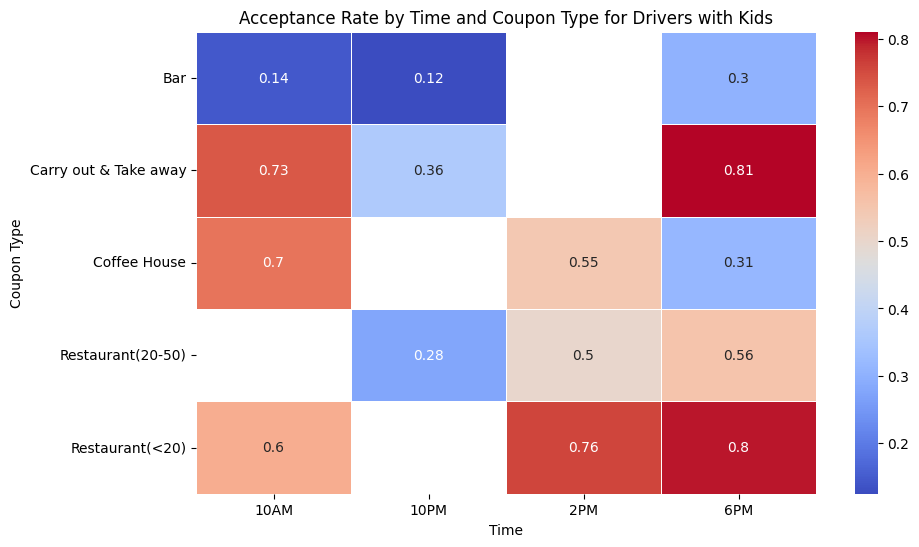

In [170]:
#Pivot table for heatmap
heatmap_data = acceptance_rates.pivot(index='coupon', columns='time', values='acceptance_rate')

#Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)

#Formatting
plt.title("Acceptance Rate by Time and Coupon Type for Drivers with Kids")
plt.xlabel("Time")
plt.ylabel("Coupon Type")
plt.show()



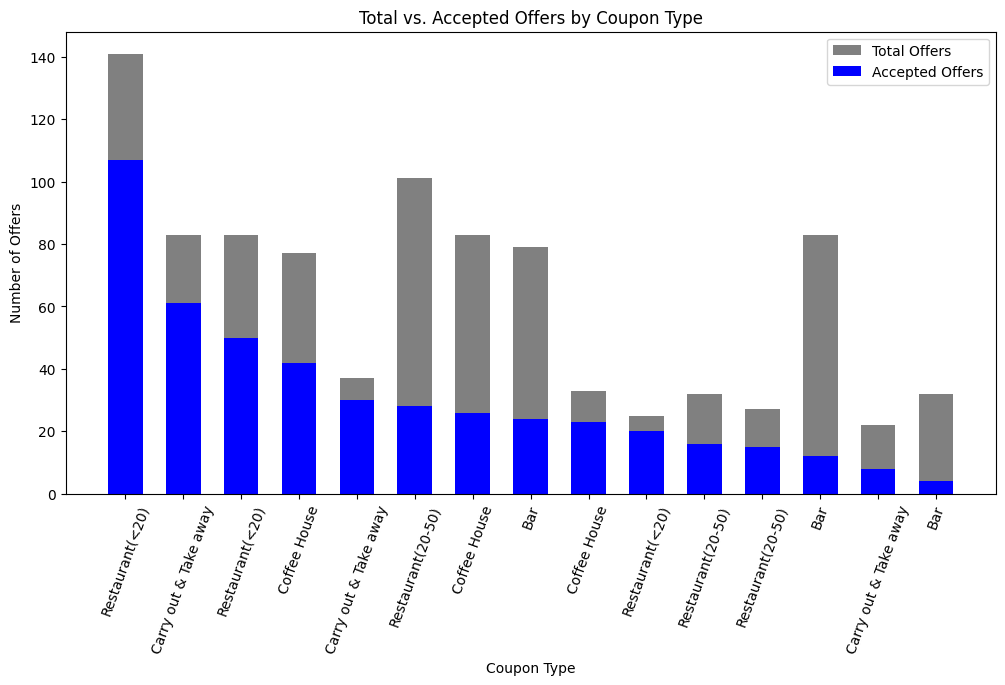

In [138]:


#Sort data
sorted_data = acceptance_rates.sort_values(by='accepted_offers', ascending=False)

# Bar width
bar_width = 0.6
x = np.arange(len(sorted_data))

plt.figure(figsize=(12,6))
plt.bar(x, sorted_data['total_offers'], width=bar_width, label="Total Offers", color='gray')
plt.bar(x, sorted_data['accepted_offers'], width=bar_width, label="Accepted Offers", color='blue',)

# Formatting
plt.xlabel("Coupon Type")
plt.ylabel("Number of Offers")
plt.title("Total vs. Accepted Offers by Coupon Type")
plt.xticks(x, sorted_data['coupon'], rotation=70)
plt.legend()
plt.show()


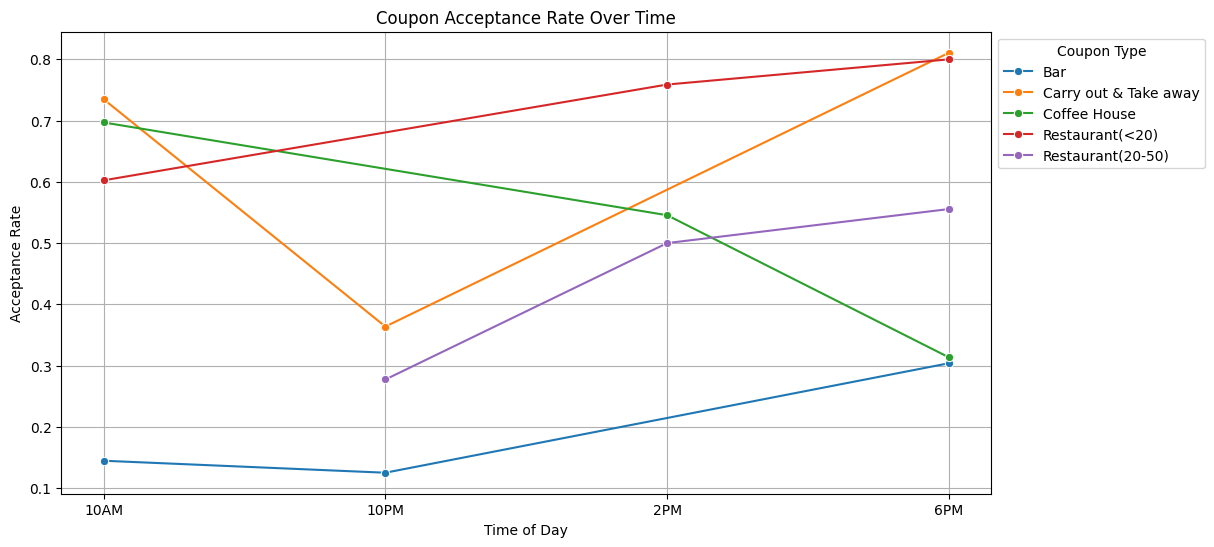

In [139]:
plt.figure(figsize=(12,6))
sns.lineplot(data=acceptance_rates, x='time', y='acceptance_rate', marker='o', hue='coupon', palette='tab10')

# Formatting
plt.xlabel("Time of Day")
plt.ylabel("Acceptance Rate")
plt.title("Coupon Acceptance Rate Over Time")
plt.legend(title="Coupon Type", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()


In [141]:

#plt.figure(figsize=(10,6))
#sns.scatterplot(x='total_offers', y='acceptance_rate', hue='coupon', size='accepted_offers', data=acceptance_rates, sizes=(25,250), palette="viridis")


#plt.xlabel("Total Offers")
#plt.ylabel("Acceptance Rate")
#plt.title("Acceptance Rate vs. Total Offers by Coupon Type")
#plt.legend(title="Coupon Type", bbox_to_anchor=(1, 1))
#plt.show()
###